In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

In [2]:
xy = np.array([[.2, .4], [.4, .2], [.65, .3], [.8, .5], [.5, .8], [.25, .8]])

In [3]:
labels = np.array([[0], [0], [0], [1], [1], [1]], dtype = np.int32)

In [4]:
print(xy)

[[0.2  0.4 ]
 [0.4  0.2 ]
 [0.65 0.3 ]
 [0.8  0.5 ]
 [0.5  0.8 ]
 [0.25 0.8 ]]


In [5]:
print(labels)

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [6]:
W = tf.Variable(np.array([[6], [10]]), dtype=tf.float64)

In [7]:
b = tf.Variable(np.array([-8]), dtype = tf.float64)

In [8]:
x = tf.placeholder(tf.float64, shape=(None, 2))

In [57]:
yhat = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [10]:
sess = tf.Session()

2021-12-06 08:16:35.287953: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-06 08:16:35.287972: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-06 08:16:35.287987: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (68ca66e711d1): /proc/driver/nvidia/version does not exist
2021-12-06 08:16:35.288190: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-06 08:16:35.293009: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3292170000 Hz
2021-12-06 08:16:35.293173: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c13824f170 initialized for platform Host (this does not guarantee tha

In [11]:
init = tf.global_variables_initializer()

In [12]:
sess.run(init)

In [13]:
predict = sess.run(yhat, feed_dict={x:xy})

In [14]:
print(predict)

[[0.05732418]
 [0.02659699]
 [0.24973989]
 [0.85814894]
 [0.95257413]
 [0.81757448]]


In [15]:
predict[0:3] = 1.0 - predict[0:3] 

In [16]:
print(predict)

[[0.94267582]
 [0.97340301]
 [0.75026011]
 [0.85814894]
 [0.95257413]
 [0.81757448]]


In [17]:
prob = np.prod(predict)

In [18]:
print(prob)

0.46010365197843245


In [19]:
y = tf.placeholder(tf.float64, shape = (None, 1))

In [20]:
loss = tf.reduce_mean(-y * tf.log(yhat) - (1 - y) * tf.log(1 - yhat))

In [21]:
predict, loss_value = sess.run([yhat, loss], feed_dict={x:xy, y:labels})

In [22]:
prob = np.prod(predict)

In [23]:
print(-np.log(np.prod(predict)), loss_value * len(xy))

8.276303484494179 0.7763034844941787


In [24]:
import Batch 

MaxEpochs = 1000
lr = 1.0
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)
features = xy
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]
batch_size = 10

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(MaxEpochs) :
    for x_batch, y_batch in Batch.generate_batches(batch_size, shuffled_features, shuffled_labels) :
        sess.run(train, feed_dict = {x : x_batch, y : y_batch.reshape(-1, 1)})

W_sgd, b_sgd = sess.run([W, b])
print(W_sgd, b_sgd)


[[19.87812717]
 [55.41697986]] [-36.51124893]


In [25]:
tf.keras.utils.plot_model(sess, yhat, lambda x,y: [x, y], 'Trained Model')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [26]:
from tensorflow.examples.tutorials.mnist import input_data

In [27]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [28]:
from collections import Counter

In [29]:
freq = Counter([np.argmax(label) for label in mnist.train.labels])

In [30]:
for k in range(0, 10):
    print("label {0}: {1}개".format(k, freq[k]))

label 0: 5444개
label 1: 6179개
label 2: 5470개
label 3: 5638개
label 4: 5307개
label 5: 4987개
label 6: 5417개
label 7: 5715개
label 8: 5389개
label 9: 5454개


In [31]:
plt.figure(figsize=(16, 8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

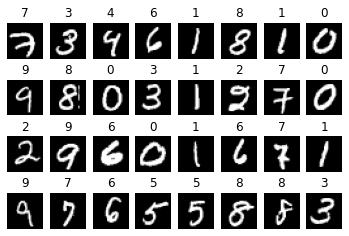

In [32]:
for k in range(32):
    img = mnist.train.images[k].reshape(28, 28)
    label = np.argmax(mnist.train.labels[k])
    plt.subplot(4, 8, 1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()


In [33]:
features = mnist.train.images
labels = mnist.train.labels

In [34]:
x = tf.placeholder(tf.float32, [None, 784])

In [35]:
W = tf.Variable(tf.zeros([784, 10]))

In [36]:
b = tf.Variable(tf.zeros([10]))

In [37]:
yhat = tf.nn.softmax(tf.matmul(x, W) + b)

In [38]:
y = tf.placeholder(tf.float32, [None, 10])

In [39]:
loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(yhat), 1))

In [40]:
MaxEpochs = 1

In [41]:
lr = 0.02

In [42]:
optimizer = tf.train.AdamOptimizer(lr)

In [43]:
train = optimizer.minimize(loss)

In [44]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(yhat, 1))

In [45]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [46]:
batch_size = 256

In [47]:
init = tf.global_variables_initializer()

In [48]:
sess = tf.Session()

In [49]:
sess.run(init)

In [50]:
for epoch in range(MaxEpochs):
    for step in range(batch_size+1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x: batch_xs, y: batch_ys})
        if step % 20 == 0:
            curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:features, y:labels})
            curr_Acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_Acc)
    print("")

2021-12-06 08:16:46.153642: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 172480000 exceeds 10% of system memory.
2021-12-06 08:16:46.280038: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 172480000 exceeds 10% of system memory.


0 0 1.9885682 0.3676
0 20 0.42102295 0.881


2021-12-06 08:16:46.389453: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 172480000 exceeds 10% of system memory.
2021-12-06 08:16:46.493640: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 172480000 exceeds 10% of system memory.


0 40 0.3685505 0.8995
0 60 0.34332785 0.9078


2021-12-06 08:16:46.595520: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 172480000 exceeds 10% of system memory.


0 80 0.322856 0.9093
0 100 0.3064387 0.9147
0 120 0.30239865 0.9177
0 140 0.3015832 0.9151
0 160 0.29843235 0.9165
0 180 0.29668152 0.9152
0 200 0.28881356 0.9172
0 220 0.28740388 0.9198
0 240 0.29233417 0.9168



In [51]:
print(curr_W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
test_id = 15

In [53]:
test_image = mnist.test.images[test_id]

In [54]:
test_label = mnist.test.labels[test_id]

In [55]:
out = sess.run(yhat, feed_dict={x:[test_image]})

In [56]:
print("Predicted Label: {}, Real Label: {}".format(np.argmax(out), np.argmax(test_label)))

Predicted Label: 5, Real Label: 5
